<a href="https://colab.research.google.com/github/marianaamaya092105-wq/Challenge-Python-para-Data-Science/blob/main/RetoPythonParaDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [42]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Ver numero de filas y columnas:

In [6]:
tienda.shape
tienda2.shape
tienda3.shape
tienda4.shape

(2358, 12)

Ver básicos de los datos

In [8]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


Suma de ventas por tienda en variables separadas

In [12]:
ingreso_tienda1 = tienda["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()
print(ingreso_tienda1)
print(ingreso_tienda2)
print(ingreso_tienda3)
print(ingreso_tienda4)

1150880400.0
1116343500.0
1098019600.0
1038375700.0


Crear un dataframe de los resultados

     Tienda  Ingreso Total
0  Tienda 1   1.150880e+09
1  Tienda 2   1.116344e+09
2  Tienda 3   1.098020e+09
3  Tienda 4   1.038376e+09


<Axes: xlabel='Tienda'>

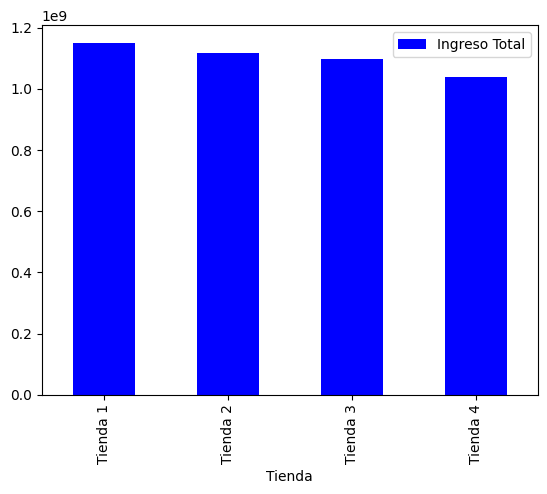

In [43]:
ingresos_tiendas = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingreso Total": [
        tienda["Precio"].sum(),
        tienda2["Precio"].sum(),
        tienda3["Precio"].sum(),
        tienda4["Precio"].sum()
    ]
})
print(ingresos_tiendas)

ingresos_tiendas.plot(x="Tienda", y="Ingreso Total", kind="bar", color="blue")

# 2. Ventas por categoría

Ver las categorias posibles

In [19]:
tienda["Categoría del Producto"].unique()

array(['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos',
       'Artículos para el hogar', 'Deportes y diversión', 'Libros',
       'Instrumentos musicales'], dtype=object)

Sumar por categoria

Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64
la categoría mas vendida fue:Muebles
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64
la categoría mas vendida fue:Muebles
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64
la categoría mas vendida fue:Mueble

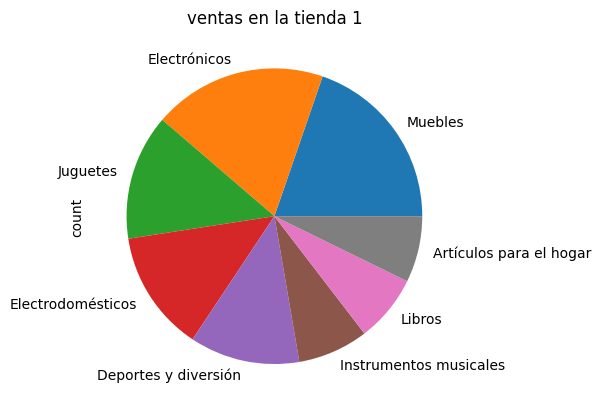

In [49]:
#tienda 1
ventas_por_categoría=tienda["Categoría del Producto"].value_counts()
ventas_por_categoría.plot(kind="pie", title="ventas en la tienda 1")
print(ventas_por_categoría)
print("la categoría mas vendida fue:"+ ventas_por_categoría.idxmax())


#tienda 2
ventas_por_categoría2=tienda2["Categoría del Producto"].value_counts()
print(ventas_por_categoría2)
print("la categoría mas vendida fue:"+ ventas_por_categoría2.idxmax())

#tienda 3
ventas_por_categoría3=tienda3["Categoría del Producto"].value_counts()
print(ventas_por_categoría3)
print("la categoría mas vendida fue:"+ ventas_por_categoría3.idxmax())

#tienda 4
ventas_por_categoría4=tienda4["Categoría del Producto"].value_counts()
print(ventas_por_categoría4)
print("la categoría mas vendida fue:"+ ventas_por_categoría4.idxmax())


# 3. Calificación promedio de la tienda


Promedio de calificación por tienda

     Tienda  Calificación promedio
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759


<Axes: xlabel='Tienda'>

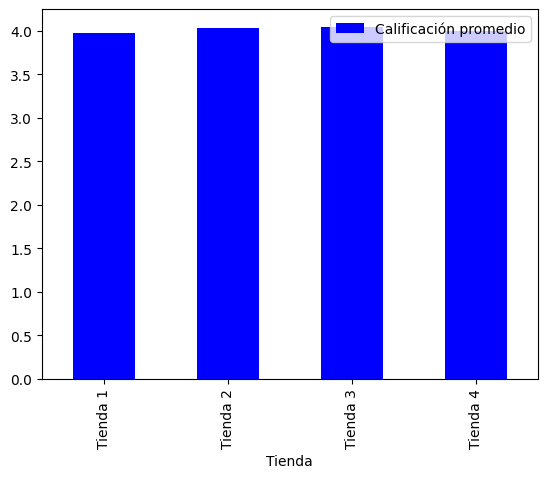

In [64]:

promedio_por_tienda = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Calificación promedio": [tienda['Calificación'].mean(),
tienda2['Calificación'].mean(),
tienda3['Calificación'].mean(),
tienda4['Calificación'].mean()]
})

print(promedio_por_tienda)

promedio_por_tienda.plot(x="Tienda", y="Calificación promedio", kind="bar", color="blue")



# 4. Productos más y menos vendidos

In [38]:

ventas_por_producto=tienda["Producto"].value_counts()
print(ventas_por_producto)
print("El producto más vendido en la tienda 1 fue:"+ ventas_por_producto.idxmax())
print("El producto menos vendido en la tienda 1 fue:"+ ventas_por_producto.idxmin())

ventas_por_producto2=tienda2["Producto"].value_counts()
print(ventas_por_producto2)
print("El producto más vendido en la tienda 2 fue:"+ ventas_por_producto2.idxmax())
print("El producto menos vendido en la tienda 2 fue:"+ ventas_por_producto2.idxmin())

ventas_por_producto3=tienda3["Producto"].value_counts()
print(ventas_por_producto3)
print("El producto más vendido en la tienda 3 fue:"+ ventas_por_producto3.idxmax())
print("El producto menos vendido en la tienda 3 fue:"+ ventas_por_producto3.idxmin())

ventas_por_producto4=tienda4["Producto"].value_counts()
print(ventas_por_producto4)
print("El producto más vendido en la tienda 4 fue:"+ ventas_por_producto4.idxmax())
print("El producto menos vendido en la tienda 4 fue:"+ ventas_por_producto4.idxmin())


Producto
Microondas                     60
TV LED UHD 4K                  60
Armario                        60
Secadora de ropa               58
Mesa de noche                  56
Bloques de construcción        56
Balón de baloncesto            55
Bicicleta                      54
Vaso térmico                   54
Refrigerador                   54
Impresora                      54
Batería                        53
Cubertería                     52
Carrito de control remoto      52
Modelado predictivo            51
Auriculares                    50
Ajedrez de madera              49
Iphone 15                      49
Lavavajillas                   48
Lavadora de ropa               47
Guitarra eléctrica             47
Guitarra acústica              46
Sofá reclinable                46
Silla de oficina               46
Estufa                         45
Cama box                       44
Kit de bancas                  44
Smart TV                       44
Cama king                      44
Cubo 

# 5. Envío promedio por tienda

     Tienda  Promedio costo de envio
0  Tienda 1             26018.609580
1  Tienda 2             25216.235693
2  Tienda 3             24805.680373
3  Tienda 4             23459.457167


<Axes: xlabel='Tienda'>

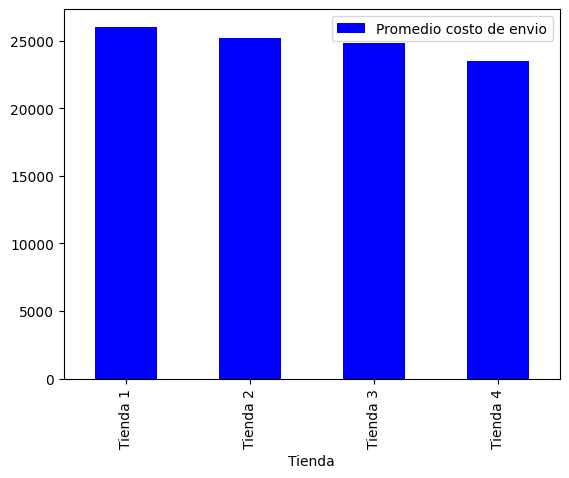

In [44]:
promedio_gastos_tiendas = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Promedio costo de envio": [
        tienda["Costo de envío"].mean(),
        tienda2["Costo de envío"].mean(),
        tienda3["Costo de envío"].mean(),
        tienda4["Costo de envío"].mean()
    ]
})
print(promedio_gastos_tiendas)
promedio_gastos_tiendas.plot(x="Tienda", y="Promedio costo de envio", kind="bar", color="blue")